In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, mean_squared_error

# Display plots inline
%matplotlib inline

In [2]:
# Load the dataset from the provided file path
file_path = "D:\Aly6110\For_Hire_Vehicles__FHV__-_Active_20250130.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Active,Vehicle License Number,Name,License Type,Expiration Date,Permit License Number,DMV License Plate Number,Vehicle VIN Number,Wheelchair Accessible,Certification Date,...,Base Name,Base Type,VEH,Base Telephone Number,Website,Base Address,Reason,Order Date,Last Date Updated,Last Time Updated
0,YES,5835662,"BEREHOUDOUGOU,M,M",FOR HIRE VEHICLE,01/08/2026,NaN,T764264C,5TDKDRBH2RS572458,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,01/30/2025,13:25
1,YES,6052423,"ZAMAN, KAMRUZ",FOR HIRE VEHICLE,06/24/2026,NaN,T135305C,JTMABACA3PA022717,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,BEV,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,01/30/2025,13:25
2,YES,5737783,"ROSARIO,RAFAEL,L",FOR HIRE VEHICLE,11/16/2026,NaN,T719527C,5TDLZRBH1MS128521,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,01/30/2025,13:25
3,YES,5897127,RIGO LIMO-AUTO CORP,FOR HIRE VEHICLE,11/09/2026,NaN,T765893C,4T1BF1FK5HU387358,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,01/30/2025,13:25
4,YES,5744919,"JEAN,,DHIMY",FOR HIRE VEHICLE,12/02/2026,NaN,KAIDILEX,5TDKDRBH0PS001211,NaN,NaN,...,"UBER USA, LLC",BLACK-CAR,NaN,(646)780-0129,NaN,1515 THIRD STREET SAN FRANCISCO CA 94158,G,NaN,01/30/2025,13:25


In [5]:
print(data.columns)


Index(['Active', 'Vehicle License Number', 'Name', 'License Type',
       'Expiration Date', 'Permit License Number', 'DMV License Plate Number',
       'Vehicle VIN Number', 'Wheelchair Accessible', 'Certification Date',
       'Hack Up Date', 'Vehicle Year', 'Base Number', 'Base Name', 'Base Type',
       'VEH', 'Base Telephone Number', 'Website', 'Base Address', 'Reason',
       'Order Date', 'Last Date Updated', 'Last Time Updated'],
      dtype='object')


In [6]:
data['WAV'] = data['Wheelchair Accessible'].apply(lambda x: 1 if x == 'WAV' else 0)


In [7]:
data['Vehicle Year'] = pd.to_numeric(data['Vehicle Year'], errors='coerce')


In [8]:
data.dropna(subset=['Vehicle Year', 'WAV'], inplace=True)


C:\Users\srile\AppData\Local\Temp\ipykernel_20328\1046883344.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='WAV', y='Vehicle Year', palette='Set2')


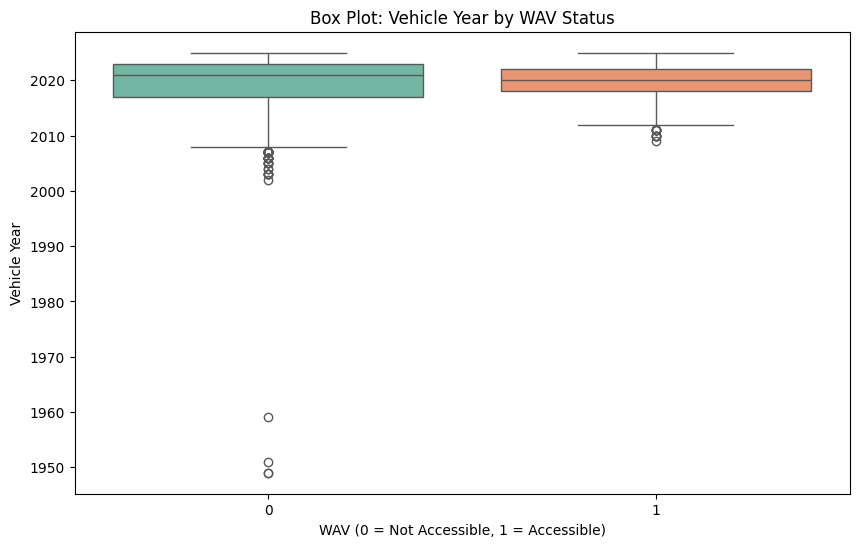

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='WAV', y='Vehicle Year', palette='Set2')
plt.title('Box Plot: Vehicle Year by WAV Status')
plt.xlabel('WAV (0 = Not Accessible, 1 = Accessible)')
plt.ylabel('Vehicle Year')
plt.show()


C:\Users\srile\AppData\Local\Temp\ipykernel_20328\666789650.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data, x='WAV', y='Vehicle Year', palette='Set3', split=True)


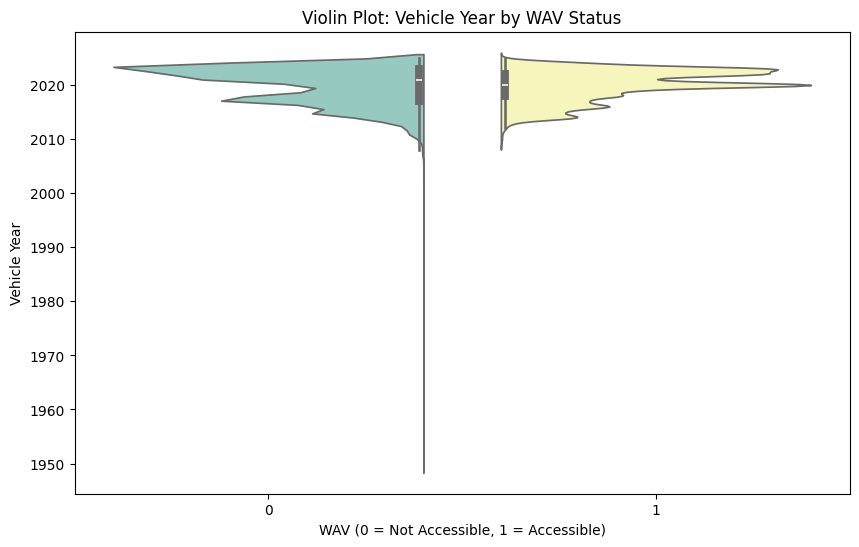

In [12]:
# Violin Plot: Distribution of Vehicle Year by WAV Status
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='WAV', y='Vehicle Year', palette='Set3', split=True)
plt.title('Violin Plot: Vehicle Year by WAV Status')
plt.xlabel('WAV (0 = Not Accessible, 1 = Accessible)')
plt.ylabel('Vehicle Year')
plt.show()


In [14]:
# Select relevant columns for analysis
columns_to_use = [
    'Vehicle Year', 'Wheelchair Accessible', 'Base Type',
    'DMV License Plate Number'
]
data = data[columns_to_use]

# Encode target variable (WAV: 1 if Wheelchair Accessible == 'WAV', else 0)
data['WAV'] = data['Wheelchair Accessible'].apply(lambda x: 1 if x == 'WAV' else 0)

# Drop unnecessary columns
data.drop(['Wheelchair Accessible'], axis=1, inplace=True)

# Handle missing values (fill with mode for categorical or mean for numerical)
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Encode categorical variables using LabelEncoder
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Display processed dataset head
data.head()


C:\Users\srile\AppData\Local\Temp\ipykernel_20328\378310972.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WAV'] = data['Wheelchair Accessible'].apply(lambda x: 1 if x == 'WAV' else 0)
C:\Users\srile\AppData\Local\Temp\ipykernel_20328\378310972.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Wheelchair Accessible'], axis=1, inplace=True)
C:\Users\srile\AppData\Local\Temp\ipykernel_20328\378310972.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The 

,Vehicle Year,Base Type,DMV License Plate Number,WAV
0,2024,0,84662,0
1,2023,0,34140,0
2,2021,0,65583,0
3,2017,0,85445,0
4,2023,0,2995,0


In [15]:
print(data.columns)


Index(['Vehicle Year', 'Base Type', 'DMV License Plate Number', 'WAV'], dtype='object')


In [16]:
#test and train the data
# Split the data into features (X) and target (y)
X = data.drop('WAV', axis=1)
y = data['WAV']

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Training set size: 85794 samples
Testing set size: 21449 samples


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     19949
           1       0.00      0.00      0.00      1500

    accuracy                           0.93     21449
   macro avg       0.47      0.50      0.48     21449
weighted avg       0.87      0.93      0.90     21449



C:\Users\srile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\srile\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

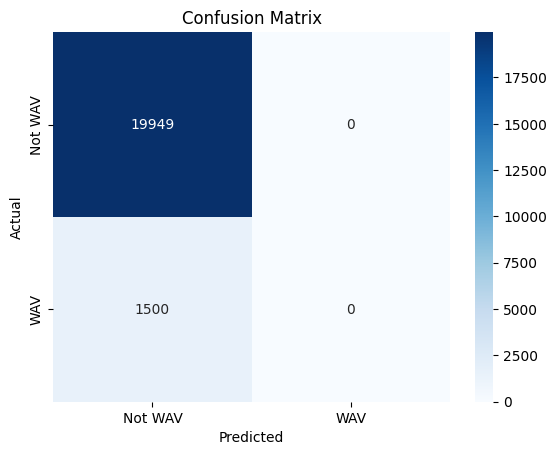

In [18]:
# Train a Logistic Regression model (for classification tasks)
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate the model using a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))

# Visualize the confusion matrix using Seaborn heatmap
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not WAV', 'WAV'], yticklabels=['Not WAV', 'WAV'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [19]:
# Train a Ridge Regression model (for regression tasks)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f"Ridge Regression Mean Squared Error: {mse_ridge}")


Ridge Regression Mean Squared Error: 0.063728314968967
